<a href="https://colab.research.google.com/github/SpaceDreams/skywatertests/blob/main/Copy_of_sky130_gm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SKY130 plots of ID-VG derivatives


Charles White, August 2022<br>
Based on: 
[Professor Murmann's Code](https://github.com/google/skywater-pdk-sky130-raw-data/blob/main/notebooks/sky130_gm.ipynb)
which was Based on:
[sky130-raw-data-viz.ipynb](https://colab.research.google.com/github/proppy/skywater-pdk-sky130-raw-data/blob/notebooks/notebooks/sky130-raw-data-viz.ipynb)<br>
SPDX-License-Identifier: Apache-2.0


## Get data

In [ ]:
!git clone https://github.com/google/skywater-pdk-sky130-raw-data

Cloning into 'skywater-pdk-sky130-raw-data'...
remote: Enumerating objects: 1065, done.
remote: Counting objects: 100% (1065/1065), done.
remote: Compressing objects: 100% (1053/1053), done.
remote: Total 1065 (delta 25), reused 1036 (delta 10), pack-reused 0
Receiving objects: 100% (1065/1065), 12.75 MiB | 14.03 MiB/s, done.
Resolving deltas: 100% (25/25), done.


## Install DeviceModelingToolkit

[DeviceModelingToolkit](https://dmt-development.gitlab.io/dmt-core/index.html) (DMT) is a Python tool targeted at helping modeling engineers extract model parameters, run circuit and TCAD simulations and automate their infrastructure.


In [ ]:
!python3 -m pip install DMT-core

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 242 kB 13.1 MB/s 
     |████████████████████████████████| 22.0 MB 1.2 MB/s 
     |████████████████████████████████| 209 kB 81.8 MB/s 
     |████████████████████████████████| 30.9 MB 31.0 MB/s 
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39408 sha256=8ef6f40b7d72b917352512e7a711c23bf5f4ea4f00d69ab40634dfb20b45dc47
  Stored in directory: /root/.cache/pip/wheels/1a/d7/a7/458a4632ccc8bfe436f5e9db9fef1aa84e5d243a1b4b4c7b59
  Created wheel for scikit-rf: filename=scikit_rf-0.23.1-py3-none-any.whl size=3408203 sha256=38b8051c23d24c5571bed77409f41d54e16d279a780cdd223c01940a4b96d01f
  Stored in directory: /root/.cache/pip/wheels/25/e7/c7/9b465c754ec65d763f881bc4272b62e17375538f03c027882d
Successfully built colormath scikit-rf


## Read measurement data

In [ ]:
import pathlib
import pandas as pd
import DMT.core
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

cells_dir = pathlib.Path('skywater-pdk-sky130-raw-data/sky130_fd_pr/cells')

# 5V device
#cell_dir = cells_dir / 'nfet_g5v0d10v5'
#mdm_path = cell_dir / 'sky130_fd_pr__nfet_g5v0d10v5_w0p420u_l0p500u_m1(2618_1_10_IDVD_D3).mdm'

# 1.8V device, regular Vt, long channel
#cell_dir = cells_dir / 'nfet_01v8'
#mdm_path = cell_dir / 'sky130_fd_pr__nfet_01v8_w7u_l8u_m1(8392_5_6_IDVG).mdm'

# 1.8V device, regular Vt, short channel
#cell_dir = cells_dir / 'nfet_01v8'
#mdm_path = cell_dir / 'sky130_fd_pr__nfet_01v8_w1u_l0p15u_m1(8436_6_7_IDVG).mdm'

# 1.8V device, regular Vt, short channel pfet
#cell_dir = cells_dir / 'pfet_01v8'
#mdm_path = cell_dir / 'sky130_fd_pr__pfet_01v8_w1u_l0p5u_m1(8405_11_10_IDVG).mdm'
cell_dir = cells_dir / 'pfet_01v8'
mdm_path = cell_dir / 'sky130_fd_pr__pfet_01v8_w1u_l0p5u_m1(8405_9_8_IDVG).mdm'

measurement = DMT.core.DutMeas(
    database_dir=None,
    dut_type=DMT.core.DutType.device,
    name=mdm_path.stem,
    reference_node='E')

measurement.add_data(pathlib.Path(mdm_path),
                     key=mdm_path.stem)
df = measurement.data[mdm_path.stem]
df = df[np.isclose(df["VD"], -1.8)]
df = df[np.isclose(df["VB"], 0)]
#df=-df
df

,VG,IG,ID,IB,VS,VB,VD
37,0.00,1.177400e-09,1.106900e-09,-1.068900e-08,0.0,0.0,-1.8
38,-0.05,6.107000e-10,2.308800e-09,1.089600e-08,0.0,0.0,-1.8
39,-0.10,7.827000e-10,2.338000e-09,1.045900e-08,0.0,0.0,-1.8
40,-0.15,9.300000e-10,2.332800e-09,9.826000e-09,0.0,0.0,-1.8
41,-0.20,1.077400e-09,2.265900e-09,9.764000e-09,0.0,0.0,-1.8
42,-0.25,-1.667600e-09,-2.377800e-09,1.040300e-08,0.0,0.0,-1.8
43,-0.30,-1.497500e-09,-3.617800e-09,6.539000e-09,0.0,0.0,-1.8
44,-0.35,1.348500e-09,-1.528800e-08,1.116000e-08,0.0,0.0,-1.8
45,-0.40,1.594900e-09,-3.055100e-08,-1.903500e-08,0.0,0.0,-1.8
46,-0.45,5.853000e-10,-7.432000e-08,1.944100e-08,0.0,0.0,-1.8


# Compute quantities of interest

In [ ]:
# simple equations for derivatives; can put in more work to use forward/backward at the edge, central in the middle
dx = 50e-3;
df['GM1'] = df['ID'].diff(1)/dx
df['GM2'] = (df['ID'] - 2*df['ID'].shift(1) + df['ID'].shift(2))/dx**2
df['GM3'] = (df['ID'] - 3*df['ID'].shift(1) + 3*df['ID'].shift(2) - df['ID'].shift(3))/dx**3
df['GM1_ID'] = df['GM1']/df['ID']
df['altGM1_ID']=np.log(df['ID']).diff(1)/dx
df['altGM1']=df['altGM1_ID']*df['ID']
df=df.fillna(0)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,VG,IG,ID,IB,VS,VB,VD,GM1,GM2,GM3,GM1_ID,altGM1_ID,altGM1
37,0.00,1.177400e-09,1.106900e-09,-1.068900e-08,0.0,0.0,-1.8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
38,-0.05,6.107000e-10,2.308800e-09,1.089600e-08,0.0,0.0,-1.8,2.403800e-08,0.000000e+00,0.000000e+00,10.411469,14.703292,3.394696e-08
39,-0.10,7.827000e-10,2.338000e-09,1.045900e-08,0.0,0.0,-1.8,5.840000e-10,-4.690800e-07,0.000000e+00,0.249786,0.251359,5.876775e-10
40,-0.15,9.300000e-10,2.332800e-09,9.826000e-09,0.0,0.0,-1.8,-1.040000e-10,-1.376000e-08,9.106400e-06,-0.044582,-0.044532,-1.038843e-10
41,-0.20,1.077400e-09,2.265900e-09,9.764000e-09,0.0,0.0,-1.8,-1.338000e-09,-2.468000e-08,-2.184000e-07,-0.590494,-0.581945,-1.318628e-09
42,-0.25,-1.667600e-09,-2.377800e-09,1.040300e-08,0.0,0.0,-1.8,-9.287400e-08,-1.830720e-06,-3.612080e-05,39.058794,0.000000,0.000000e+00
43,-0.30,-1.497500e-09,-3.617800e-09,6.539000e-09,0.0,0.0,-1.8,-2.480000e-08,1.361480e-06,6.384400e-05,6.854995,0.000000,0.000000e+00
44,-0.35,1.348500e-09,-1.528800e-08,1.116000e-08,0.0,0.0,-1.8,-2.334040e-07,-4.172080e-06,-1.106712e-04,15.267138,0.000000,0.000000e+00
45,-0.40,1.594900e-09,-3.055100e-08,-1.903500e-08,0.0,0.0,-1.8,-3.052600e-07,-1.437120e-06,5.469920e-05,9.991817,0.000000,0.000000e+00
46,-0.45,5.853000e-10,-7.432000e-08,1.944100e-08,0.0,0.0,-1.8,-8.753800e-07,-1.140240e-05,-1.993056e-04,11.778525,0.000000,0.000000e+00


# Plots

**comments:** 
*   From the log plot, we see that the data gets noisy below 2nA.


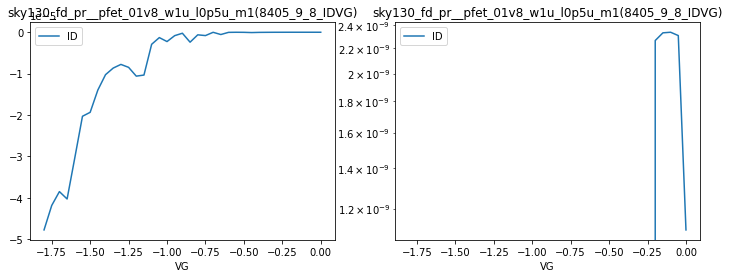

In [ ]:
# plot ID-VG on linear and log scales

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df.plot(x="VG", y="ID", ax=axes[0], logy=False, title = mdm_path.stem)
df.plot(x="VG", y="ID", ax=axes[1], logy=True, title = mdm_path.stem)
plt.show()

**comments:** 

*   gm looks OK, showing velocity saturation. But, not sure why there are kinks above ~1.2V
*   Not surprisingly, gm/ID looks bad below VG ~ 0.5V (or gm/ID ~ 15 S/A) due to the noise in ID
*   This means the data cannot be used to predict the subthreshold slope (digital leakage) or peak gm/ID (for low power analog)

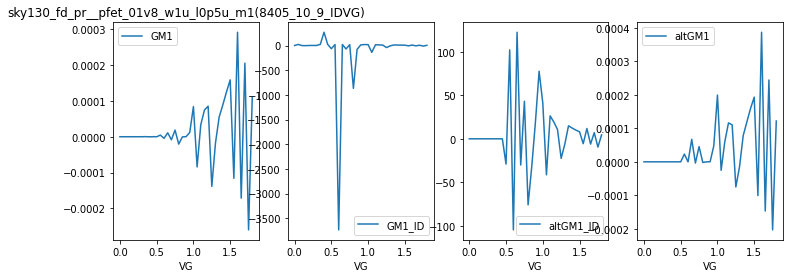

In [ ]:
# plot gm and gm/ID
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
df.dropna()
df
df.plot(x="VG", y="GM1", ax=axes[0], title = mdm_path.stem)
df.plot(x="VG", y="GM1_ID", ax=axes[1])
df.plot(x="VG", y="altGM1_ID", ax=axes[2])
df.plot(x="VG", y="altGM1", ax=axes[3])
plt.show()

**comments:**
*   Looks noisy, but curve fitting & filtering may help here
*   If we squint a little bit, we can see the expected zero crossing in GM3; a sweet spot for low-distortion design 

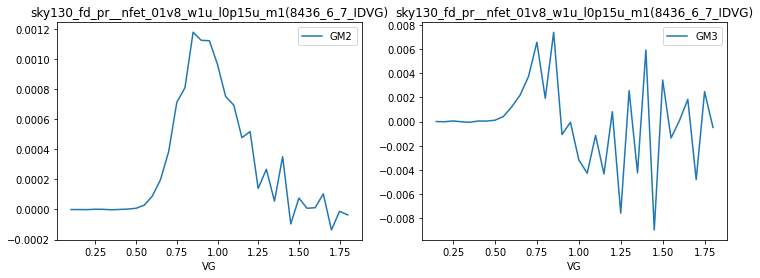

In [ ]:
# plot high-order derivatives (for distortion modeling)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df.plot(x="VG", y="GM2", ax=axes[0], title = mdm_path.stem)
df.plot(x="VG", y="GM3", ax=axes[1], title = mdm_path.stem)
plt.show()

For comparison, refer to [data](https://www.mos-ak.org/munich_2007/papers/02_MOS-AK_Assenmacher.pdf) collected by Infineon for PSP modeling. Key points:

*   Their ID looks noise free down to several tens of pA, see p. 12 (instead of 2nA)
*   The derivatives computed from measurements look cleaner, see p. 13 (though I don't know how exactly how they were computed)
*   Their VG step size is also 50mV, so should be OK for us as well




